In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2

In [2]:
print(f"Competition Files and Folders: {os.listdir('/kaggle/input/happy-whale-and-dolphin')}")

Competition Files and Folders: ['sample_submission.csv', 'train_images', 'train.csv', 'test_images']


In [3]:
train_df = pd.read_csv('/kaggle/input/happy-whale-and-dolphin/train.csv')
samp_submission_df = pd.read_csv('/kaggle/input/happy-whale-and-dolphin/sample_submission.csv')

In [4]:
train_df.loc[train_df.species == 'kiler_whale', 'species'] = 'killer_whale'
train_df.loc[train_df.species == 'bottlenose_dolpin', 'species'] = 'bottlenose_dolphin'

In [5]:
print(f"Images in train index file: {train_df.image.nunique()}")
print(f"Species in train index file: {train_df.species.nunique()}")
print(f"Individual IDs in train index file: {train_df.individual_id.nunique()}")

Images in train index file: 51033
Species in train index file: 28
Individual IDs in train index file: 15587


In [6]:
print(f"Images in train images folder: {len(os.listdir('/kaggle/input/happy-whale-and-dolphin/train_images'))}")
print(f"Images in test images folder: {len(os.listdir('/kaggle/input/happy-whale-and-dolphin/test_images'))}")

Images in train images folder: 51033
Images in test images folder: 27956


In [7]:
def plot_image_samples(species):
    root_path = "/kaggle/input/happy-whale-and-dolphin/"
   # fig.subplots_adjust(hspace = .1, wspace=.1)
    images_folder="train_images/"
    df = train_df[train_df['species']==species].copy()
    df.index = range(len(df.index))

    f, ax = plt.subplots(4, 4, figsize=(16,16))

    for i in range(16):
        file = df.loc[i, 'image']
        species = df.loc[i, 'species']
        identifier = df.loc[i, 'individual_id']
        img = cv2.imread(root_path+images_folder+file)
        ax[i//4, i%4].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax[i//4, i%4].set_title(identifier+" ("+species+")")
        ax[i//4, i%4].axis('off')

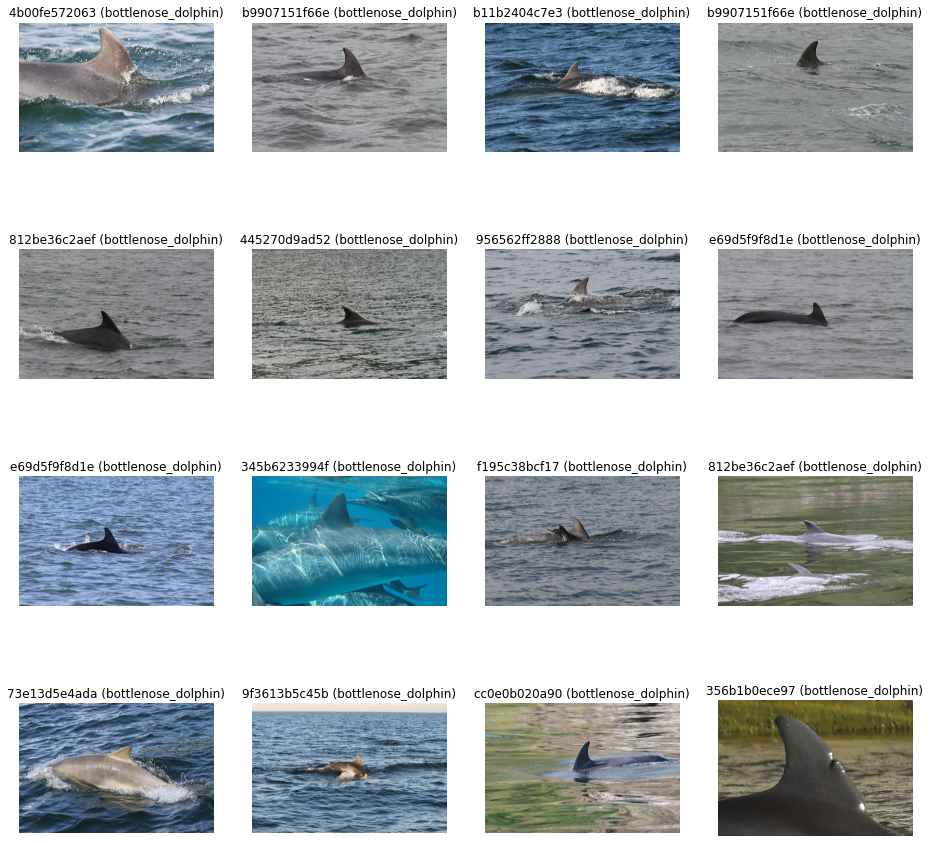

In [8]:
plot_image_samples('bottlenose_dolphin')

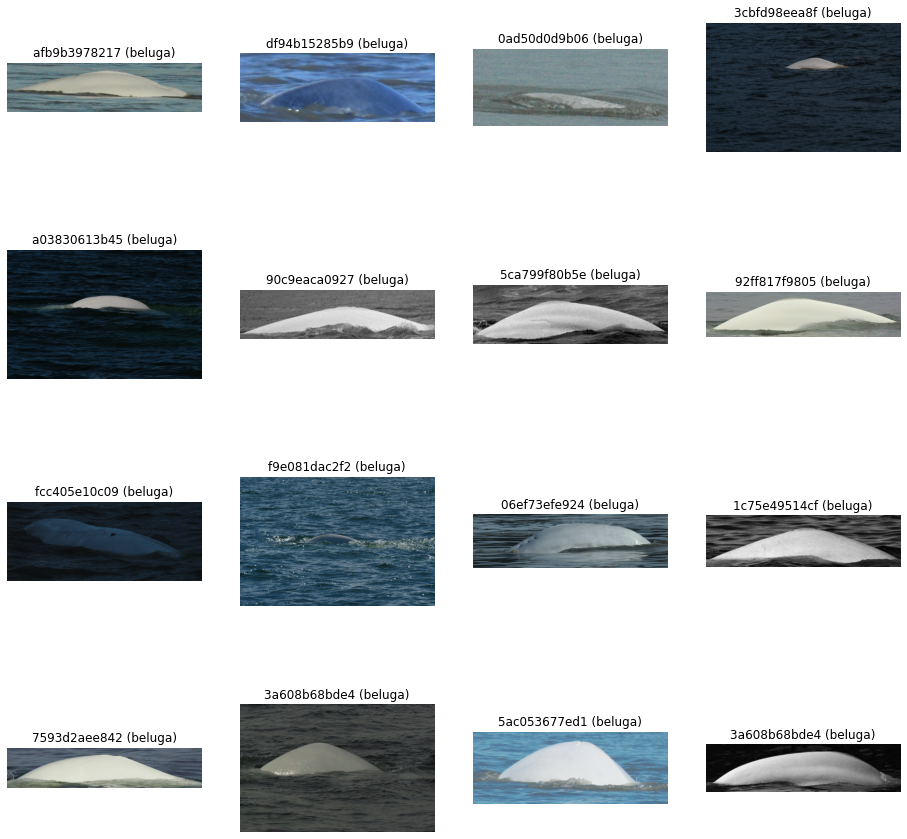

In [9]:
plot_image_samples('beluga')

In [10]:
import tensorflow as tf

In [11]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=None,
        shear_range=0.2,
        zoom_range=0.2,
        vertical_flip=True)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=None)
train_generator = train_datagen.flow_from_directory(
        '/kaggle/input/happy-whale-and-dolphin/train_images/',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        '/kaggle/input/happy-whale-and-dolphin/test_images/',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
